## VAR model ver 1
using actual shortlisted variables

In [506]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tools.eval_measures import rmse, aic

import warnings
warnings.filterwarnings("ignore")

In [507]:
# Read csv
file_path = '../data/final/wo_na.csv'
df = pd.read_csv(file_path)

In [508]:
list_of_variables = ['Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)']
hrc = ['Date', 'HRC (FOB, $/t)']
final_cols = hrc + list_of_variables

df = df[final_cols]
df.head()

,Date,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),Monthly Export of Semis & Finished Steel as % of Production,FAI in urban real estate development (y-o-y) Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y)
0,2006-09-01,472,59,116,252,14.277778,24.3,24.0,6.0,34.2,3.9
1,2006-10-01,477,62,85,260,13.657895,24.1,25.1,11.4,31.8,6.7
2,2006-11-01,470,62,84,262,16.078947,24.0,26.1,8.3,28.9,7.2
3,2006-12-01,470,61,90,270,15.512821,21.8,27.0,13.1,15.8,16.1
4,2007-01-01,470,62,98,273,13.026316,24.3,45.0,8.6,15.8,16.1


In [509]:
final_df = df.copy()
final_df.set_index('Date', inplace=True)

final_df.head()

,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),Monthly Export of Semis & Finished Steel as % of Production,FAI in urban real estate development (y-o-y) Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y)
Date,,,,,,,,,,
2006-09-01,472,59,116,252,14.277778,24.3,24.0,6.0,34.2,3.9
2006-10-01,477,62,85,260,13.657895,24.1,25.1,11.4,31.8,6.7
2006-11-01,470,62,84,262,16.078947,24.0,26.1,8.3,28.9,7.2
2006-12-01,470,61,90,270,15.512821,21.8,27.0,13.1,15.8,16.1
2007-01-01,470,62,98,273,13.026316,24.3,45.0,8.6,15.8,16.1


In [510]:
# Split dataset into train and test set
final_df_train, final_df_test = final_df[0:-17], final_df[-17:]

print(final_df_train.shape)
print(final_df_test.shape)

(201, 10)
(17, 10)


In [511]:
# Difference data to achieve stationarity
final_df_train_differenced = final_df_train.diff().dropna()

In [512]:
# Determine the best number of lags
model = VAR(final_df_train_differenced)
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,45.13,45.30*,3.965e+19,45.20*
1,44.92,46.82,3.245e+19*,45.69
2,45.02,48.64,3.611e+19,46.49
3,45.19,50.52,4.334e+19,47.35
4,45.32,52.38,5.157e+19,48.18
5,45.52,54.29,6.721e+19,49.07
6,45.64,56.14,8.449e+19,49.89
7,45.97,58.20,1.372e+20,50.93
8,46.11,60.05,1.930e+20,51.76
9,46.22,61.89,2.864e+20,52.57


In [513]:
# Print the optimal lag order based on AIC / BIC
print(x.aic, x.bic, x.hqic)  

12 0 0


In [514]:
# Fit model with optimal lag
model_fitted = model.fit(7)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Apr, 2025
Time:                     17:10:37
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    57.8090
Nobs:                     193.000    HQIC:                   50.6670
Log likelihood:          -6448.86    FPE:                1.12346e+20
AIC:                      45.8063    Det(Omega_mle):     4.89881e+18
--------------------------------------------------------------------
Results for equation HRC (FOB, $/t)
                                                                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------------------
const                                                                  1.118319         2.031441            0.551  

In [515]:
# Test if there is any serial correlation in the residuals using the Durbin Watson's Statistic.
# Significant correlation may imply that some pattern in the time series has yet to be captured and may
# require more variables to be included / using a different lag order / using a different model.
# A Durbin Watson value close to 2 implies no significant serial correlation. Values closer to 0 and 4 imply
# positive and negative serial correlation respectively.

out = durbin_watson(model_fitted.resid)

for col, val in zip(final_df.columns, out):
    print(col, ':', round(val, 2))

HRC (FOB, $/t) : 1.99
Iron Ore (CFR, $/t) : 2.0
HCC (Aus FOB, $/t) : 2.03
Domestic Scrap (DDP Jiangsu incl. VAT $/t) : 2.16
Monthly Export of Semis & Finished Steel as % of Production : 1.96
FAI in urban real estate development (y-o-y) Growth : 1.97
Automobile Production (y-o-y) : 2.01
Civil Metal-Vessels/Steel Ships (y-o-y) : 1.96
Household Fridges (y-o-y) : 2.02
Air Conditioner (y-o-y) : 1.98


In [516]:
# Using the last _ observations (since lag order is _) to forecast the following periods
lag_order = model_fitted.k_ar
forecast_input = final_df_train_differenced.values[-lag_order:]
forecast_input

array([[-25.        ,   1.        ,  -8.        ,  -9.        ,
          0.96020143,  -1.        ,  -2.5       ,  -3.        ,
         -0.4       ,  -1.2       ],
       [ 49.        ,  18.        , -19.        ,  43.        ,
         -0.51982012,  -0.2       ,  -2.2       ,   0.6       ,
          0.1       ,  -0.2       ],
       [ 48.        ,  12.        ,  55.        ,  24.        ,
          7.85130395,   4.3       , -17.4       , -17.4       ,
         11.5       ,   9.        ],
       [ 25.        ,   3.        ,  51.        ,   3.        ,
         -4.57136237,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ 19.        ,   1.        , -24.        ,  -1.        ,
         -1.89663462,  -0.1       ,   8.9       ,  14.        ,
          0.5       ,   1.8       ],
       [-43.        , -11.        , -76.        , -25.        ,
          0.30813172,  -0.4       ,   9.4       ,   8.4       ,
          2.6       ,  -0.4       ],
       [-6

In [517]:
# Forecast the following 12 periods (length of test set)
fc = model_fitted.forecast(y=forecast_input, steps=34)
fc_period = pd.date_range(start='6/1/2023', end='3/1/2026', freq='MS')
df_forecast = pd.DataFrame(fc, index=fc_period, columns=final_df_test.columns + '_1d')
df_forecast.index.name = 'Date'
df_forecast

,"HRC (FOB, $/t)_1d","Iron Ore (CFR, $/t)_1d","HCC (Aus FOB, $/t)_1d",Domestic Scrap (DDP Jiangsu incl. VAT $/t)_1d,Monthly Export of Semis & Finished Steel as % of Production_1d,FAI in urban real estate development (y-o-y) Growth_1d,Automobile Production (y-o-y)_1d,Civil Metal-Vessels/Steel Ships (y-o-y)_1d,Household Fridges (y-o-y)_1d,Air Conditioner (y-o-y)_1d
Date,,,,,,,,,,
2023-06-01,-38.274353,2.080663,-40.250011,-17.383615,-0.088987,-3.661895,-2.965799,8.627490,-5.855573,-3.179435
2023-07-01,-31.055701,2.772130,-25.779355,-44.800824,-1.292840,-2.687677,-11.036882,2.815380,-4.307061,-6.895390
2023-08-01,-13.158591,-22.013373,22.588037,12.873147,-1.249000,2.002586,3.652886,1.543206,-1.393753,4.375341
2023-09-01,9.584451,1.623242,35.321983,34.455500,-0.255729,-1.013908,2.318351,-8.637686,2.175503,-2.041325
2023-10-01,40.065126,6.478666,29.084995,23.090081,0.977486,-0.871622,-3.927562,-7.990730,1.867150,-0.399852
2023-11-01,37.107204,5.458122,-1.936384,6.795566,0.236222,0.095550,-2.911348,1.469834,0.997598,-0.141449
2023-12-01,14.729790,-2.524271,-2.620962,10.369657,0.625545,2.464167,9.529594,4.877240,2.369346,4.735478
2024-01-01,8.801561,9.575637,-2.572900,2.990167,1.036320,0.178057,-3.932372,0.245955,-0.817634,-2.666973
2024-02-01,-4.173511,-0.264800,13.837333,-23.548819,0.865614,0.733093,1.861374,-3.229174,-0.861877,1.938646


In [518]:
# De-difference forecasted results
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_forecast_processed = invert_transformation(final_df_train, df_forecast)

In [519]:
df_forecast_a, df_forecast_b = df_forecast_processed[0:-17], df_forecast_processed[-17:]
final_df.index = pd.to_datetime(final_df.index)
final_df_train.index = pd.to_datetime(final_df_train.index)
final_df_test.index = pd.to_datetime(final_df_test.index)

df_forecast_b.to_csv('../data/final/var_forecast_1.csv', index=True)

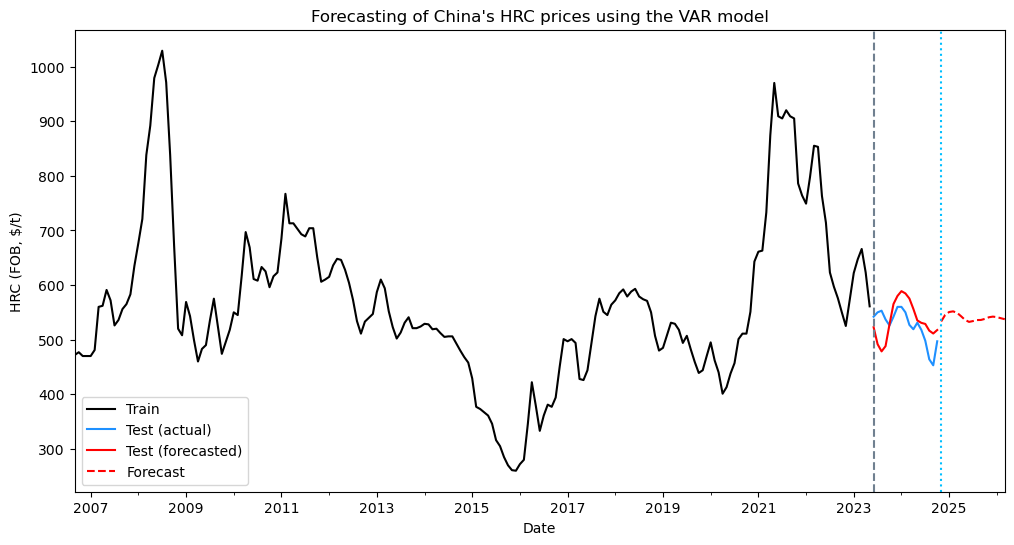

In [520]:
# Compare forecasted with actual results
fig, ax = plt.subplots(figsize=(12, 6))

final_df_train['HRC (FOB, $/t)'].plot(color='k', label='Train')
final_df_test['HRC (FOB, $/t)'].plot(color='dodgerblue', label='Test (actual)')
df_forecast_a['HRC (FOB, $/t)_forecast'].plot(color='r', label='Test (forecasted)')
df_forecast_b['HRC (FOB, $/t)_forecast'].plot(color='r', linestyle ='dashed', label='Forecast')

plt.title("Forecasting of China's HRC prices using the VAR model")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
plt.axvline(x = '2023-06-01', color = 'slategray', linestyle = 'dashed')
plt.axvline(x = '2024-11-01', color = 'deepskyblue', linestyle = 'dotted')
ax.legend()

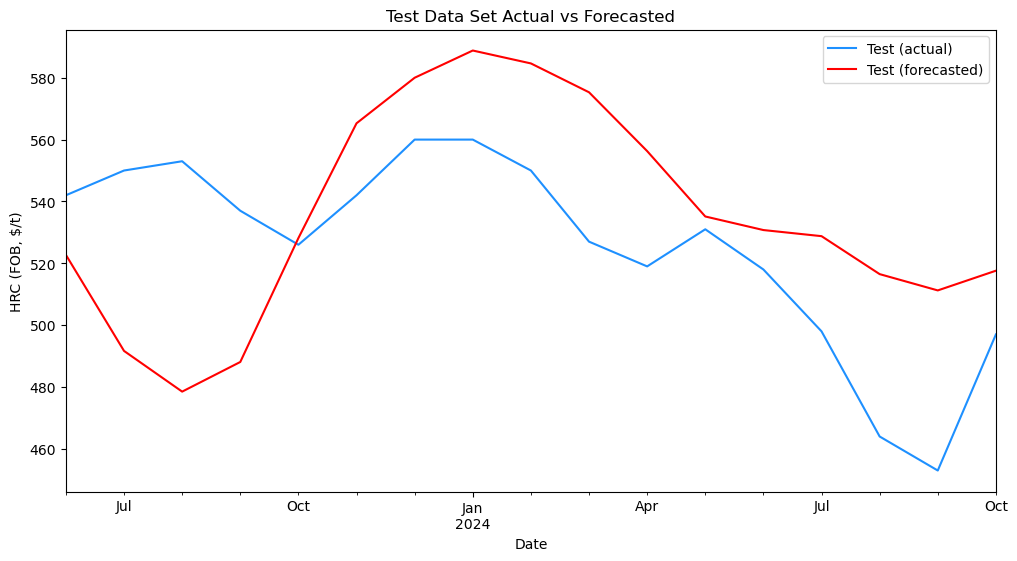

In [521]:
fig, ax = plt.subplots(figsize=(12, 6))

final_df_test['HRC (FOB, $/t)'].plot(color='dodgerblue', label='Test (actual)')
df_forecast_a['HRC (FOB, $/t)_forecast'].plot(color='r', label='Test (forecasted)')

plt.title("Test Data Set Actual vs Forecasted")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
ax.legend()

In [522]:
# Error metrics

forecast = df_forecast_a['HRC (FOB, $/t)_forecast'].values
actual = final_df_test['HRC (FOB, $/t)']

mae = np.mean(np.abs(forecast - actual))
rmse = np.mean((forecast - actual)**2)**.5
mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
print('Mean Absolute Error: ', mae)
print('Root Mean Squared Error: ', rmse)
print('Mean Absolute Percentage Error: ', mape)

Mean Absolute Error:  33.790258838320476
Root Mean Squared Error:  39.190125608043545
Mean Absolute Percentage Error:  0.06502150739884983


### Impulse Response Analysis

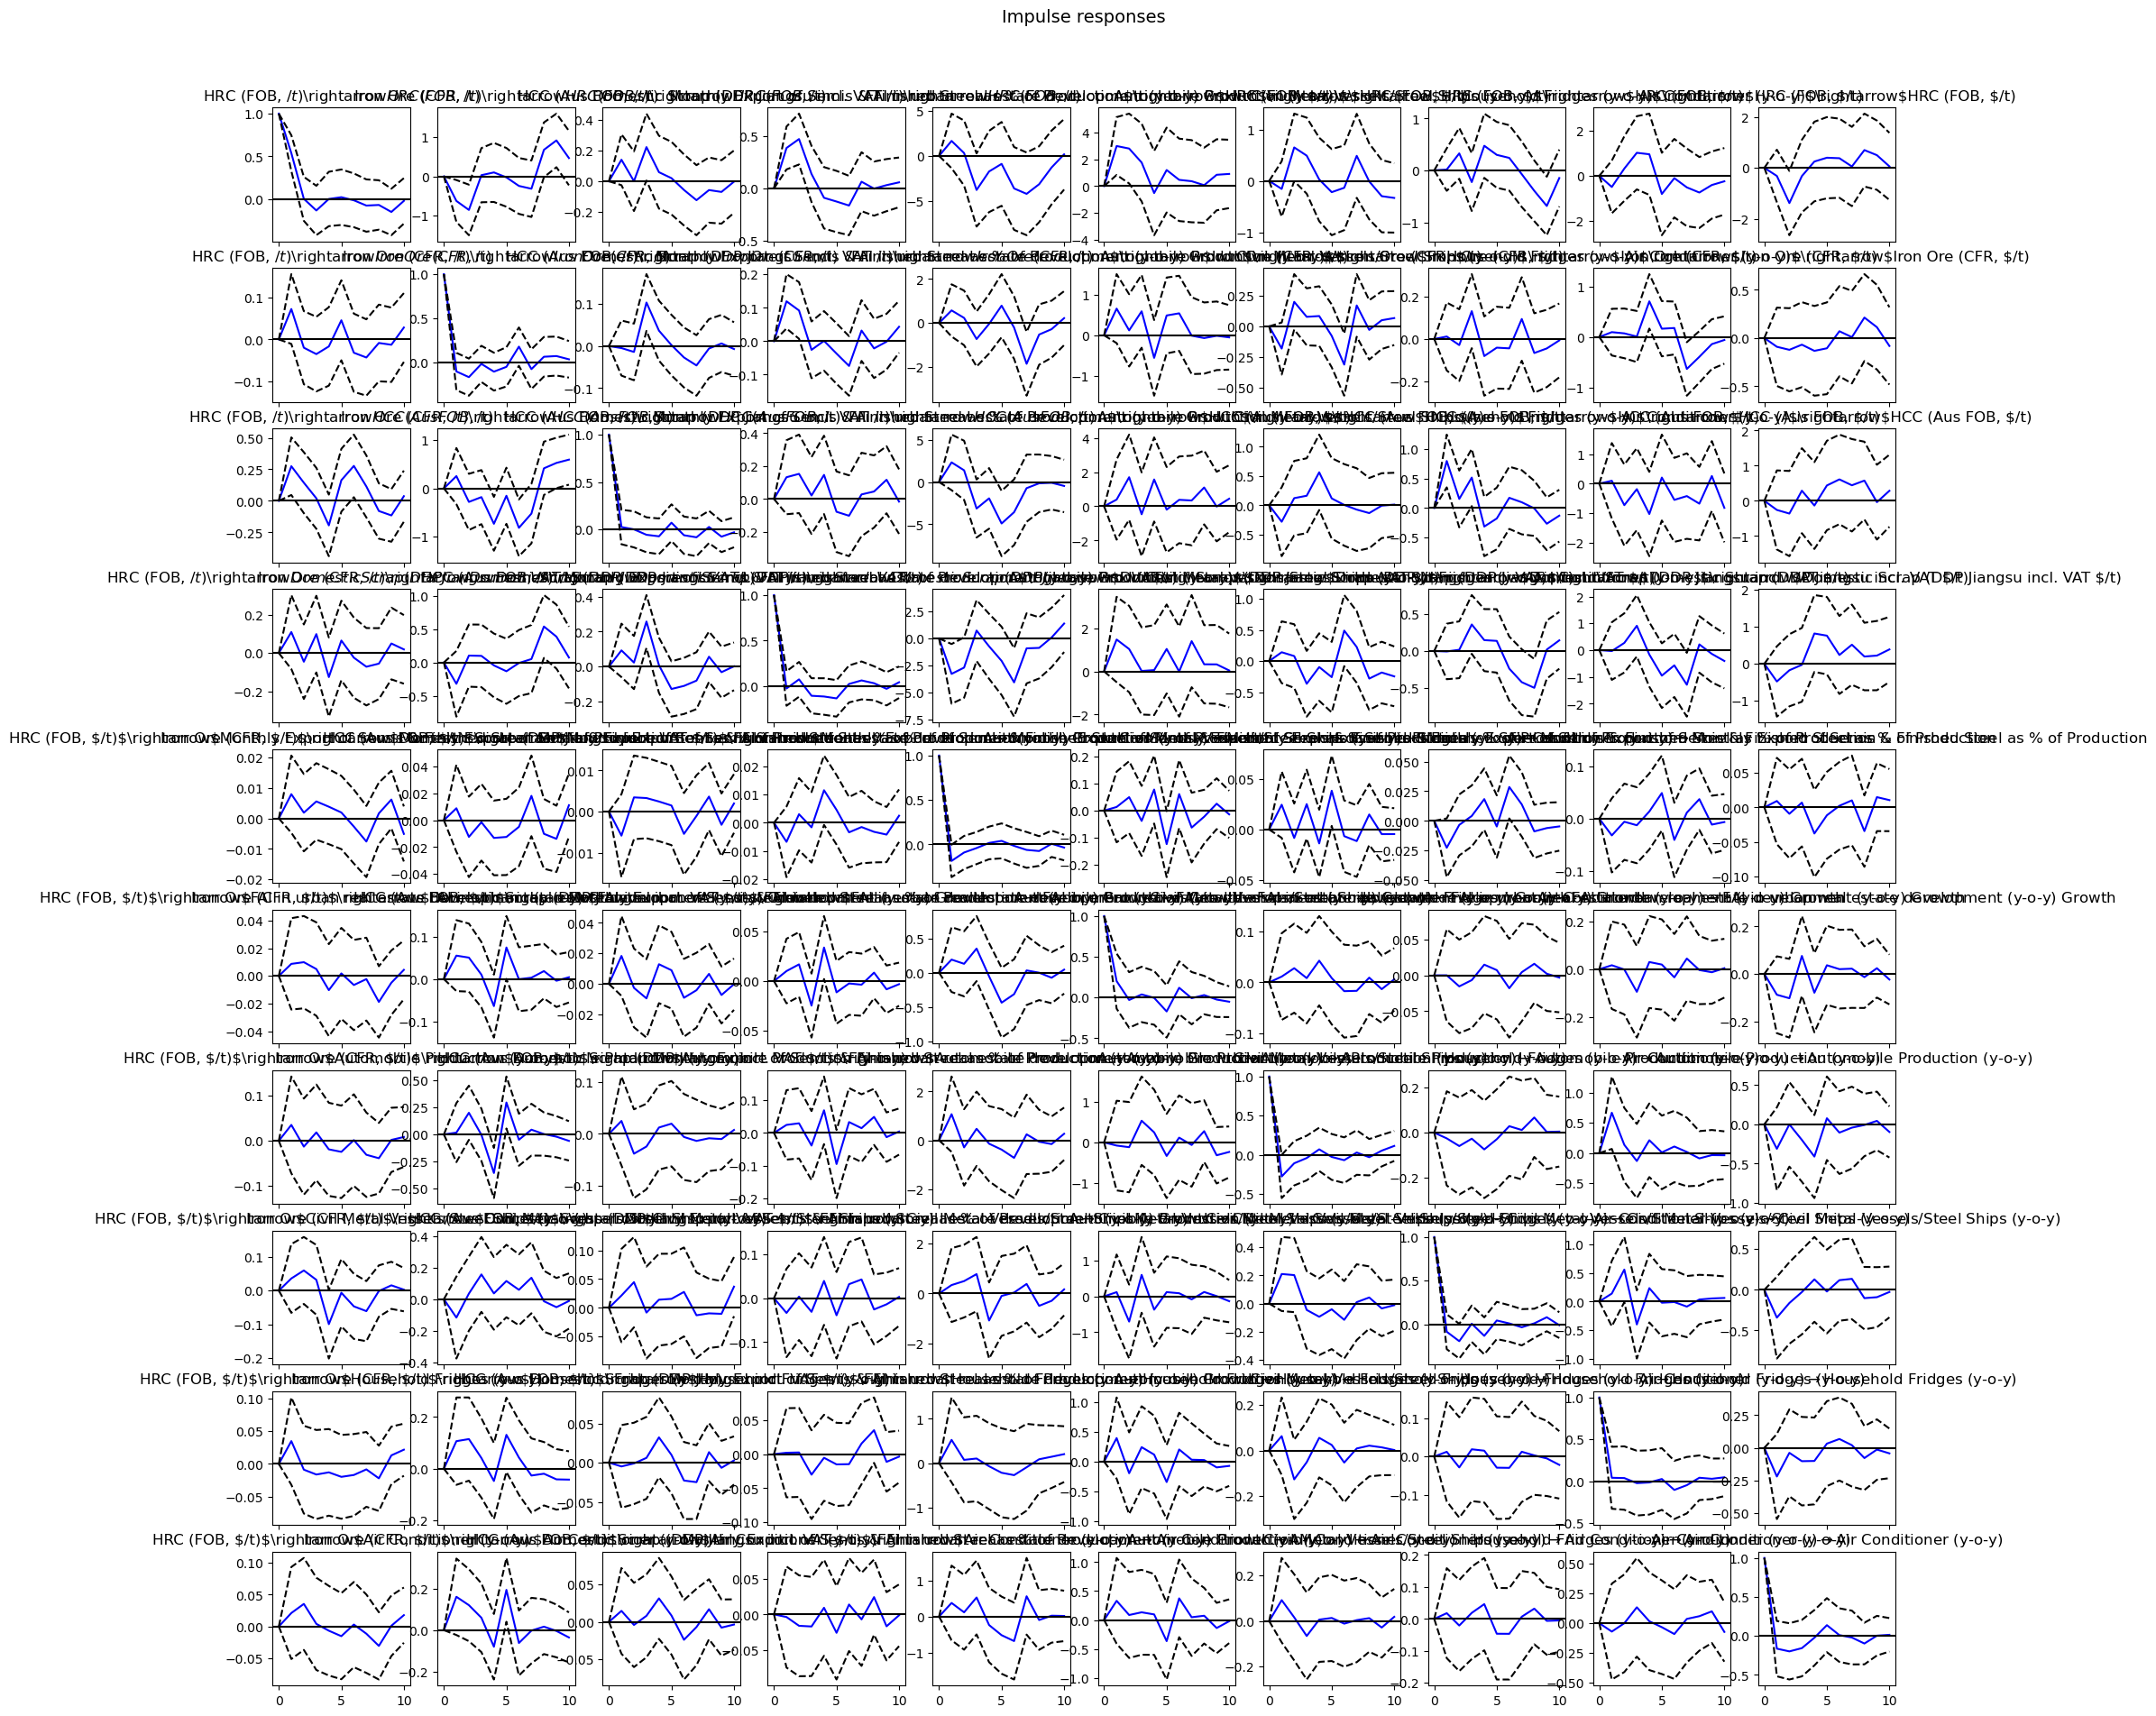

In [523]:
irf = model_fitted.irf(10)
#irf.plot(impulse='RM Cost \n($/t)', response='HRC \n(FOB, $/t)', figsize=(12,6))
irf.plot(figsize=(20,20))
plt.show()

## VAR Model ver 2
using actual variables, using whole data set as train data set to predict the prices

In [524]:
# Read csv
file_path = '../data/final/wo_na.csv'
df2 = pd.read_csv(file_path)
df2.head()

,Date,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),HRC - RM Spread ($/t),Monthly Export of Semis & Finished Steel as % of Production,FAI in urban real estate development (y-o-y) Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y)
0,2006-09-01,472,59,116,252,261,14.277778,24.3,24.0,6.0,34.2,3.9
1,2006-10-01,477,62,85,260,292,13.657895,24.1,25.1,11.4,31.8,6.7
2,2006-11-01,470,62,84,262,288,16.078947,24.0,26.1,8.3,28.9,7.2
3,2006-12-01,470,61,90,270,282,15.512821,21.8,27.0,13.1,15.8,16.1
4,2007-01-01,470,62,98,273,273,13.026316,24.3,45.0,8.6,15.8,16.1


In [525]:
list_of_variables = ['Iron Ore (CFR, $/t)', 'HCC (Aus FOB, $/t)',
         'Domestic Scrap (DDP Jiangsu incl. VAT $/t)',
         'Monthly Export of Semis & Finished Steel as % of Production',
         'FAI in urban real estate development (y-o-y) Growth',
         'Automobile Production (y-o-y)', 'Civil Metal-Vessels/Steel Ships (y-o-y)',
         'Household Fridges (y-o-y)', 'Air Conditioner (y-o-y)']
hrc = ['Date', 'HRC (FOB, $/t)']
final_cols = hrc + list_of_variables

df2 = df2[final_cols]

In [526]:
final_df2 = df2.copy()
final_df2.set_index('Date', inplace=True)

final_df2.head()

,"HRC (FOB, $/t)","Iron Ore (CFR, $/t)","HCC (Aus FOB, $/t)",Domestic Scrap (DDP Jiangsu incl. VAT $/t),Monthly Export of Semis & Finished Steel as % of Production,FAI in urban real estate development (y-o-y) Growth,Automobile Production (y-o-y),Civil Metal-Vessels/Steel Ships (y-o-y),Household Fridges (y-o-y),Air Conditioner (y-o-y)
Date,,,,,,,,,,
2006-09-01,472,59,116,252,14.277778,24.3,24.0,6.0,34.2,3.9
2006-10-01,477,62,85,260,13.657895,24.1,25.1,11.4,31.8,6.7
2006-11-01,470,62,84,262,16.078947,24.0,26.1,8.3,28.9,7.2
2006-12-01,470,61,90,270,15.512821,21.8,27.0,13.1,15.8,16.1
2007-01-01,470,62,98,273,13.026316,24.3,45.0,8.6,15.8,16.1


In [527]:
# Difference data to achieve stationarity
final_df2_differenced = final_df2.diff().dropna()

In [528]:
# Determine the best number of lags
model2 = VAR(final_df2_differenced)
x2 = model2.select_order(maxlags=12)
x2.summary()

,AIC,BIC,FPE,HQIC
0,44.88,45.04*,3.098e+19,44.95*
1,44.62,46.40,2.387e+19*,45.34
2,44.72,48.12,2.660e+19,46.10
3,44.90,49.92,3.229e+19,46.93
4,45.00,51.65,3.704e+19,47.69
5,45.22,53.49,4.843e+19,48.56
6,45.33,55.22,5.875e+19,49.33
7,45.74,57.25,9.849e+19,50.39
8,46.01,59.14,1.506e+20,51.32
9,46.24,60.99,2.339e+20,52.20


In [529]:
# Use lag with the lowest AIC
model_fitted2 = model2.fit(7)
model_fitted2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 07, Apr, 2025
Time:                     17:10:47
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                    56.8694
Nobs:                     210.000    HQIC:                   50.1278
Log likelihood:          -7052.84    FPE:                8.01091e+19
AIC:                      45.5530    Det(Omega_mle):     4.35323e+18
--------------------------------------------------------------------
Results for equation HRC (FOB, $/t)
                                                                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------------------------------
const                                                                  1.002308         1.896515            0.529  

In [530]:
# Test if there is any serial correlation in the residuals using the Durbin Watson's Statistic.
# Significant correlation may imply that some pattern in the time series has yet to be captured and may
# require more variables to be included / using a different lag order / using a different model.
# A Durbin Watson value close to 2 implies no significant serial correlation. Values closer to 0 and 4 imply
# positive and negative serial correlation respectively.

out2 = durbin_watson(model_fitted2.resid)

for col, val in zip(final_df2.columns, out2):
    print(col, ':', round(val, 2))

HRC (FOB, $/t) : 1.99
Iron Ore (CFR, $/t) : 2.01
HCC (Aus FOB, $/t) : 2.01
Domestic Scrap (DDP Jiangsu incl. VAT $/t) : 2.15
Monthly Export of Semis & Finished Steel as % of Production : 1.97
FAI in urban real estate development (y-o-y) Growth : 1.98
Automobile Production (y-o-y) : 2.01
Civil Metal-Vessels/Steel Ships (y-o-y) : 1.97
Household Fridges (y-o-y) : 2.0
Air Conditioner (y-o-y) : 1.98


In [531]:
# Using the last _ observations (since lag order is _) to forecast the following periods
lag_order2 = model_fitted2.k_ar
forecast_input2 = final_df2_differenced.values[-lag_order2:]
forecast_input2

array([[ -8.        ,   1.        , -36.        , -21.        ,
         -0.51770613,  -0.3       ,   2.4       ,  -1.5       ,
          1.3       ,   1.1       ],
       [ 12.        ,   7.        ,   0.        ,  16.        ,
         -0.36609152,  -0.3       ,  -1.1       ,  -0.8       ,
         -2.        ,  -0.9       ],
       [-13.        , -11.        ,  10.        , -12.        ,
         -0.84396914,   0.        ,  -0.9       ,  -0.3       ,
         -2.4       ,  -2.9       ],
       [-20.        ,  -1.        , -12.        ,  -2.        ,
         -0.07713463,  -0.1       ,  -1.2       ,   0.1       ,
         -2.4       ,  -4.3       ],
       [-34.        ,  -7.        , -31.        , -30.        ,
          2.74575224,   0.        ,  -1.1       ,  -0.3       ,
          0.        ,  -1.7       ],
       [-11.        ,  -5.        , -19.        ,  -9.        ,
          1.002331  ,   0.1       ,  -0.7       ,   0.        ,
          0.2       ,   0.2       ],
       [ 4

In [532]:
# Forecast the following 12 periods (length of test set)
fc2 = model_fitted2.forecast(y=forecast_input2, steps=17)
fc_period2 = pd.date_range(start='11/1/2024', end='3/1/2026', freq='MS')
df_forecast2 = pd.DataFrame(fc2, index=fc_period2, columns=final_df2.columns + '_1d')
df_forecast2.index.name = 'Date'
df_forecast2

,"HRC (FOB, $/t)_1d","Iron Ore (CFR, $/t)_1d","HCC (Aus FOB, $/t)_1d",Domestic Scrap (DDP Jiangsu incl. VAT $/t)_1d,Monthly Export of Semis & Finished Steel as % of Production_1d,FAI in urban real estate development (y-o-y) Growth_1d,Automobile Production (y-o-y)_1d,Civil Metal-Vessels/Steel Ships (y-o-y)_1d,Household Fridges (y-o-y)_1d,Air Conditioner (y-o-y)_1d
Date,,,,,,,,,,
2024-11-01,14.251625,0.872313,19.017576,-2.387154,-0.750780,1.563932,3.895110,-0.899176,2.698975,1.769857
2024-12-01,-1.139339,-1.447163,14.515082,4.396699,-0.471862,0.878500,5.072100,2.233990,1.278726,1.631241
2025-01-01,1.615364,4.456595,-14.976748,5.754067,-0.309330,-2.027175,-0.587305,-2.214166,-1.547211,-1.962700
2025-02-01,-1.515699,2.192758,-26.819237,-12.556005,0.414959,-1.479034,-5.183401,-4.622753,-2.106428,-3.348385
2025-03-01,-8.789479,0.023950,-0.458349,-5.100263,0.321247,0.386781,0.777964,0.377890,0.410670,2.183823
2025-04-01,-17.169398,-4.619189,-3.095789,-9.823536,-0.365113,-0.778915,-0.959995,-1.115471,-1.071342,-0.401997
2025-05-01,-18.498020,-5.415034,-1.845363,-10.617775,-0.207499,-0.554959,-1.018715,0.520402,-0.268668,-0.605272
2025-06-01,-9.009273,-2.670290,-0.397669,-1.685459,-0.329055,-0.124829,1.326755,-1.066946,0.901530,0.073706
2025-07-01,-5.463966,0.047878,-3.235978,5.364866,-0.348263,-0.325715,1.062335,0.165561,0.617576,-0.022469


In [533]:
# De-difference forecasted results
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

df_forecast2_processed = invert_transformation(final_df2, df_forecast2)

In [534]:
final_df2.index = pd.to_datetime(final_df2.index)

df_forecast2_processed.to_csv('../data/final/var_forecast_2.csv', index=True)

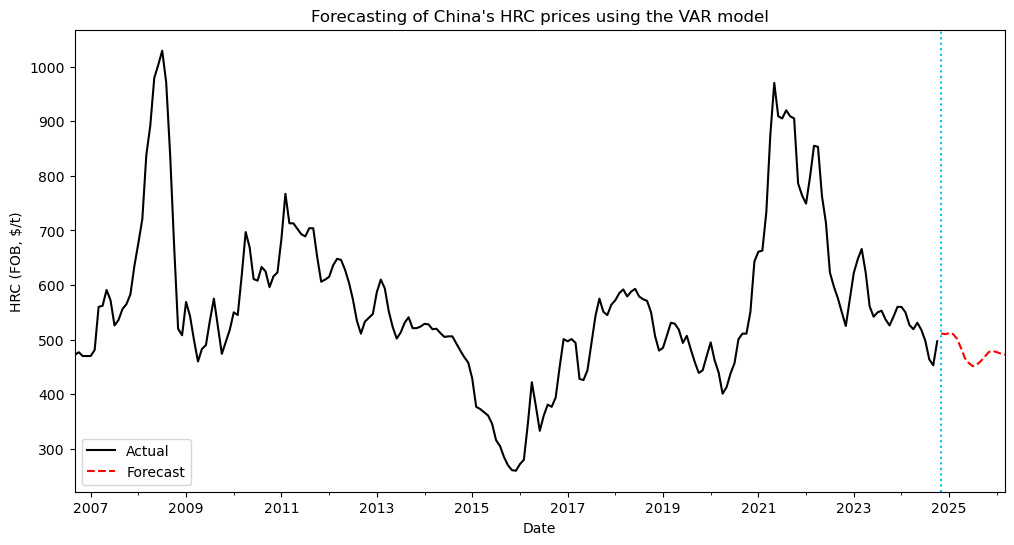

In [535]:
# Compare forecasted with actual results
fig, ax = plt.subplots(figsize=(12, 6))

final_df2['HRC (FOB, $/t)'].plot(color='k', label='Actual')
df_forecast2_processed['HRC (FOB, $/t)_forecast'].plot(color='r', linestyle ='dashed', label='Forecast')

plt.title("Forecasting of China's HRC prices using the VAR model")
plt.ylabel("HRC (FOB, $/t)")
plt.xlabel("Date")
plt.axvline(x = '2024-11-01', color = 'deepskyblue', linestyle = 'dotted')
ax.legend()